In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df_fake = pd.read_csv("E:\ML\FAke News\Fake.csv")
df_true = pd.read_csv("E:\ML\FAke News\True.csv")

In [3]:

df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# insert column as target value

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
print(df_fake.shape)
print(df_true.shape)

(23481, 5)
(21417, 5)


# Removing last 10 rows for manual testing

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
    
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

# insert target for testing

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1


<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


# merge tsesting

In [11]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

# Merge Trainig

In [12]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head()


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
#remove unrequired columns
df = df_merge.drop(["title", "subject","date"], axis = 1)


In [15]:
df.sample(5)

,text,class
19778,NC REPUBLICAN HEADQUARTERS Firebombed By The T...,0
3741,Donald Trump made this way too easy for George...,0
5679,WASHINGTON (Reuters) - President Donald Trump’...,1
3895,Paul Ryan just gave another one of his notorio...,0
2205,It s no secret at this point that Donald Trump...,0


# check Missing

In [16]:

df.isnull().sum()


text     0
class    0
dtype: int64

In [17]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


# check Dublicated

In [18]:
df.duplicated().sum()

6240

In [19]:
#remove
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [20]:
df.shape

(38638, 2)

In [21]:
df['class'].value_counts()


1    21183
0    17455
Name: class, dtype: int64

In [22]:
df.describe()

,class
count,38638.000000
mean,0.548243
std,0.497674
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


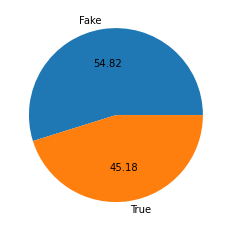

In [23]:
#vuialization
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['Fake','True'],autopct="%0.2f")
plt.show()


# process text

In [24]:

stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
string.punctuation
ps =PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

df["Transformed_text"] = df["text"].apply(transform_text)


In [25]:
df['text'][10]

10    A centerpiece of Donald Trump s campaign, and ...
10    (Reuters) - Alabama officials on Thursday cert...
Name: text, dtype: object

In [26]:
df["Transformed_text"] [10]

10    centerpiec donald trump campaign presid white ...
10    reuter alabama offici thursday certifi democra...
Name: Transformed_text, dtype: object

In [27]:
df.sample(5)

,text,class,Transformed_text
6623,WASHINGTON (Reuters) - Israel’s ambassador to ...,1,washington reuter israel ambassador unit state...
16936,Did FDR actually deliver his fireside chats wh...,0,fdr actual deliv firesid chat sit near fire ye...
1914,Investigations into Russian tampering and coll...,0,investig russian tamper collus elect gain stea...
9207,"54-year-old Dr. Dean Lorich, Associate Directo...",0,dean lorich associ director orthopaed trauma s...
12118,VIENNA (Reuters) - Austria s newly formed cons...,1,vienna reuter austria newli form conserv coali...


# Text Representation

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer()
features_CountVec= vectorizer.fit_transform(df['Transformed_text'])
print(features_CountVec.shape)


(38638, 82464)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed_text']).toarray()


In [31]:
y = df['class'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# visualize words

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [33]:
fake_wc = wc.generate(df[df['class'] == 0]['Transformed_text'].str.cat(sep=" "))

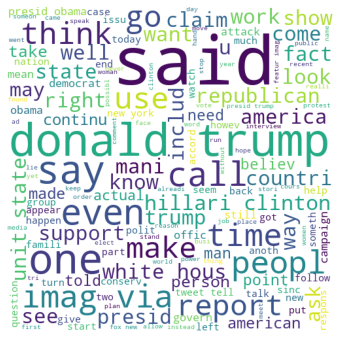

In [34]:
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(fake_wc)

In [35]:
True_wc = wc.generate(df[df['class'] == 1]['Transformed_text'].str.cat(sep=" "))

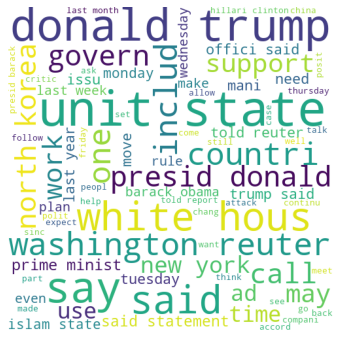

In [36]:
plt.figure(figsize=(15,6))
plt.axis('off')
plt.imshow(True_wc)

# split Data

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)




# Build Model

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [40]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc,
}


In [41]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred) 
    return accuracy


In [42]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy= train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)

    
    accuracy_scores.append(current_accuracy)
    

For  SVC
Accuracy -  0.9884057971014493
For  KN
Accuracy -  0.6967908902691511
For  NB
Accuracy -  0.9284679089026915
For  DT
Accuracy -  0.9956521739130435
For  LR
Accuracy -  0.994824016563147


In [44]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
3,DT,0.995652
4,LR,0.994824
0,SVC,0.988406
2,NB,0.928468
1,KN,0.696791


# final Model used Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=5)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred_dt))


Accuracy:  0.9955486542443064


In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4302
           1       0.99      1.00      1.00      5358

    accuracy                           1.00      9660
   macro avg       1.00      1.00      1.00      9660
weighted avg       1.00      1.00      1.00      9660



# test Model

In [50]:

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(transform_text) 
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf.fit_transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
 
    return print("\nDT Prediction: {} ".format( output_lable(pred_DT[0])))

In [51]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
ps.stem('eating')

'eat'